In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
# fragment level collisions

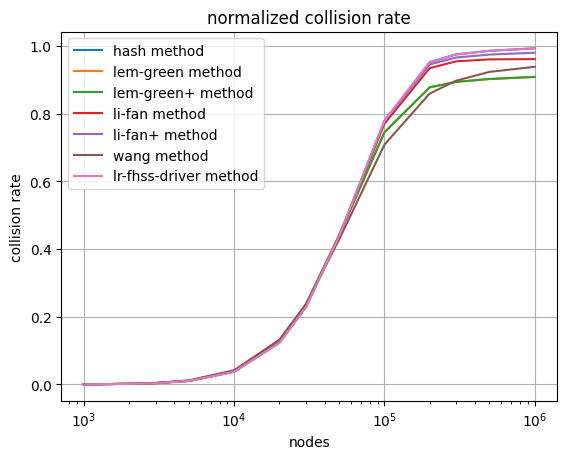

In [2]:
numOCW = 7
numOBW = 280
numGrids = 8
seq_length = 31
startLimit = 500
totalSlots = numOCW * numOBW * (startLimit + seq_length)

data = pd.read_csv('results/data.csv')
nodes = data['nodes'].to_numpy()
normColRate = data.iloc[:,1:].to_numpy() / totalSlots

for i, method in enumerate(data.keys()[1:]):
    plt.plot(nodes, normColRate[:,i], label=f'{method} method')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

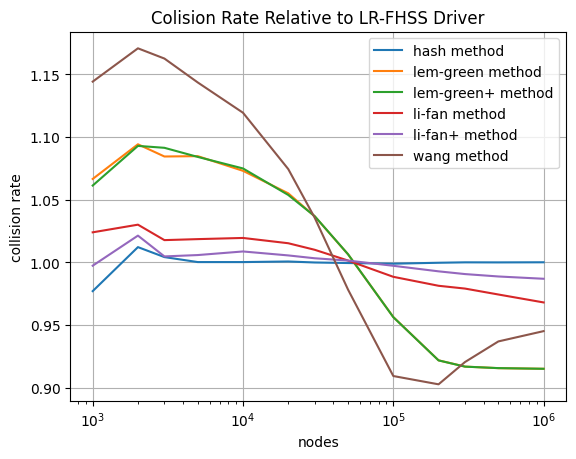

In [3]:
relColRate = data.iloc[:,1:].to_numpy()
for i in range(relColRate.shape[0]):
    relColRate[i] = relColRate[i] / relColRate[i, -1]

for i, method in enumerate(data.keys()[1:-1]):
    plt.plot(nodes, relColRate[:,i], label=f'{method} method')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

---
# packet level collisions

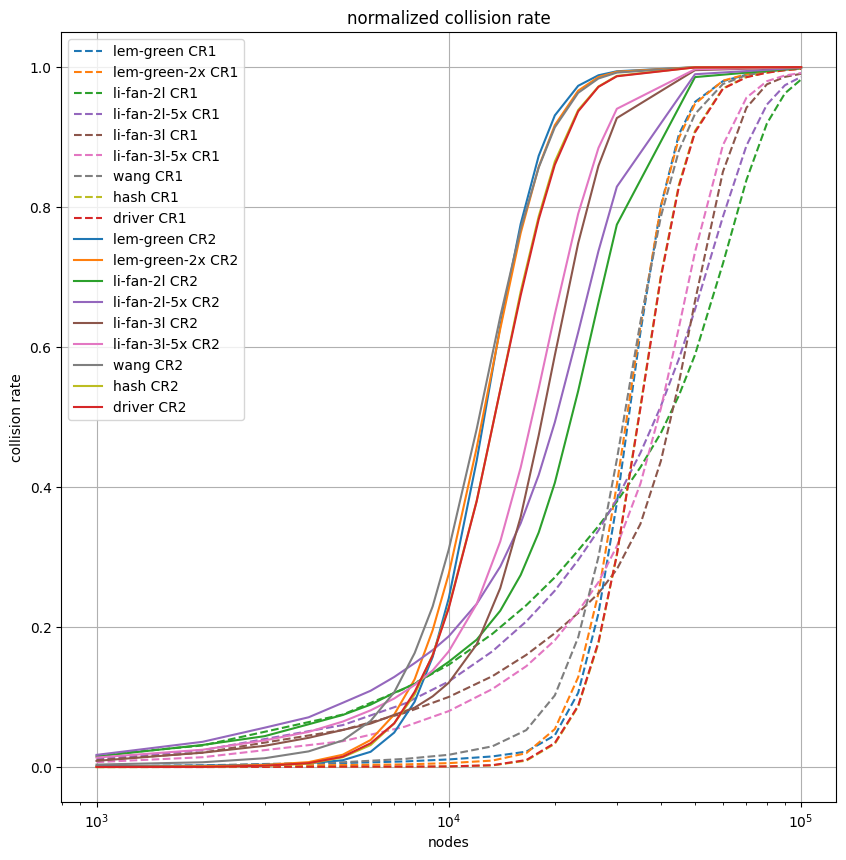

In [4]:
dataCR = pd.read_csv('results/dataCR.csv', index_col=0, header=None).T
nodesCR1 = dataCR['nodesCR1'].to_numpy()
nodesCR2 = dataCR['nodesCR2'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodesCR1, dataCR['lem-green-CR1'], label=f'lem-green CR1', color='#1f77b4', linestyle='dashed')
plt.plot(nodesCR1, dataCR['lem-green-2x-CR1'], label=f'lem-green-2x CR1', color='#ff7f0e', linestyle='dashed')
plt.plot(nodesCR1, dataCR['li-fan-2l-CR1'], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR1, dataCR['li-fan-2l-5x-CR1'], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesCR1, dataCR['li-fan-3l-CR1'], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
plt.plot(nodesCR1, dataCR['li-fan-3l-5x-CR1'], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
plt.plot(nodesCR1, dataCR['wang-CR1'], label=f'wang CR1', color='#7f7f7f', linestyle='dashed')
plt.plot(nodesCR1, dataCR['hash-CR1'], label=f'hash CR1', color='#bcbd22', linestyle='dashed')
plt.plot(nodesCR1, dataCR['lr-fhss-driver-CR1'], label=f'driver CR1', color='#d62728', linestyle='dashed')

plt.plot(nodesCR2, dataCR['lem-green-CR2'], label=f'lem-green CR2', color='#1f77b4')
plt.plot(nodesCR2, dataCR['lem-green-2x-CR2'], label=f'lem-green-2x CR2', color='#ff7f0e')
plt.plot(nodesCR2, dataCR['li-fan-2l-CR2'], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesCR2, dataCR['li-fan-2l-5x-CR2'], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesCR2, dataCR['li-fan-3l-CR2'], label=f'li-fan-3l CR2', color='#8c564b')
plt.plot(nodesCR2, dataCR['li-fan-3l-5x-CR2'], label=f'li-fan-3l-5x CR2', color='#e377c2')
plt.plot(nodesCR2, dataCR['wang-CR2'], label=f'wang CR2', color='#7f7f7f')
plt.plot(nodesCR2, dataCR['hash-CR2'], label=f'hash CR2', color='#bcbd22')
plt.plot(nodesCR2, dataCR['lr-fhss-driver-CR2'], label=f'driver CR2', color='#d62728')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

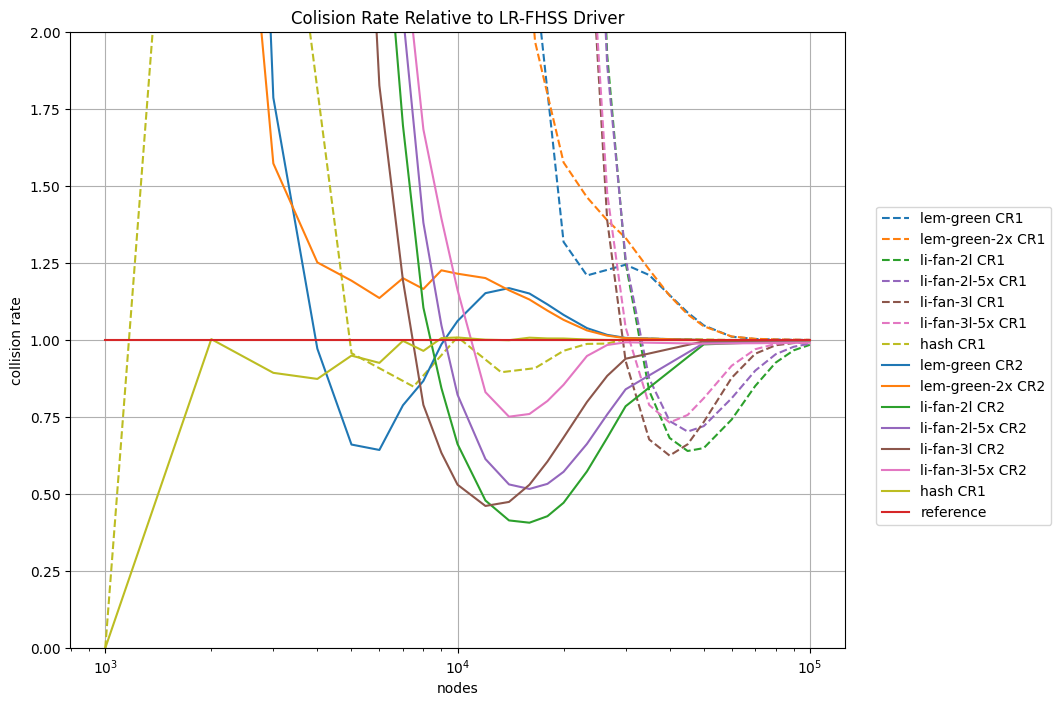

In [7]:
relColRateCR1 = dataCR[['lem-green-CR1', 'lem-green-2x-CR1', 'li-fan-2l-CR1', 'li-fan-2l-5x-CR1', 'li-fan-3l-CR1', 'li-fan-3l-5x-CR1', 'wang-CR1', 'hash-CR1', 'lr-fhss-driver-CR1']].to_numpy()
relColRateCR2 = dataCR[['lem-green-CR2', 'lem-green-2x-CR2', 'li-fan-2l-CR2', 'li-fan-2l-5x-CR2', 'li-fan-3l-CR2', 'li-fan-3l-5x-CR1', 'wang-CR2', 'hash-CR2', 'lr-fhss-driver-CR2']].to_numpy()

for i in range(relColRateCR1.shape[0]): # same size for relColRateCR2
    relColRateCR1[i] /= relColRateCR1[i, -1]
    relColRateCR2[i] /= relColRateCR2[i, -1]

plt.figure(figsize=(10,8))

plt.plot(nodesCR1, relColRateCR1[:,0], label=f'lem-green CR1', color='#1f77b4', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,1], label=f'lem-green-2x CR1', color='#ff7f0e', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,2], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,3], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,4], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,5], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
#plt.plot(nodesCR1, relColRateCR1[:,6], label=f'wang CR1', color='#7f7f7f', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,7], label=f'hash CR1', color='#bcbd22', linestyle='dashed')

plt.plot(nodesCR2, relColRateCR2[:,0], label=f'lem-green CR2', color='#1f77b4')
plt.plot(nodesCR2, relColRateCR2[:,1], label=f'lem-green-2x CR2', color='#ff7f0e')
plt.plot(nodesCR2, relColRateCR2[:,2], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesCR2, relColRateCR2[:,3], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesCR2, relColRateCR2[:,4], label=f'li-fan-3l CR2', color='#8c564b')
plt.plot(nodesCR2, relColRateCR2[:,5], label=f'li-fan-3l-5x CR2', color='#e377c2')
#plt.plot(nodesCR2, relColRateCR2[:,6], label=f'wang CR2', color='#7f7f7f')
plt.plot(nodesCR2, relColRateCR2[:,7], label=f'hash CR1', color='#bcbd22')

plt.plot(nodesCR2, [1 for _ in range(len(nodesCR2))],  label=f'reference', color='#d62728')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.ylim(0,2)
plt.grid()
plt.legend(loc=(1.04, 0.2))
plt.show()

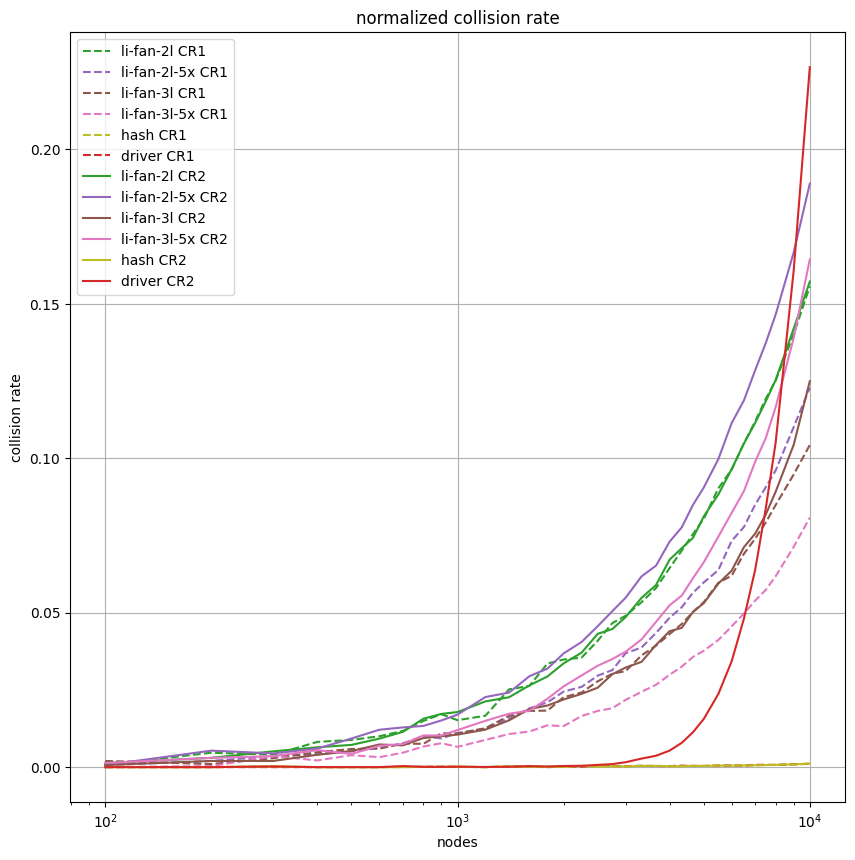

In [6]:
datanLiFanCR = pd.read_csv('results/dataLiFanCR.csv', index_col=0, header=None).T
nodesLiFan = datanLiFanCR['nodesLiFan'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-CR1'], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-5x-CR1'], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-CR1'], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-5x-CR1'], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['hash-CR1'], label=f'hash CR1', color='#bcbd22', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['lr-fhss-driver-CR1'], label=f'driver CR1', color='#d62728', linestyle='dashed')

plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-CR2'], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-5x-CR2'], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-CR2'], label=f'li-fan-3l CR2', color='#8c564b')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-5x-CR2'], label=f'li-fan-3l-5x CR2', color='#e377c2')
plt.plot(nodesLiFan, datanLiFanCR['hash-CR1'], label=f'hash CR2', color='#bcbd22')
plt.plot(nodesLiFan, datanLiFanCR['lr-fhss-driver-CR2'], label=f'driver CR2', color='#d62728')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_19240\2409933800.py:5: RuntimeWarning: divide by zero encountered in divide
  relColRateCR1[i] /= relColRateCR1[i, -1]
C:\Users\diego\AppData\Local\Temp\ipykernel_19240\2409933800.py:5: RuntimeWarning: invalid value encountered in divide
  relColRateCR1[i] /= relColRateCR1[i, -1]
C:\Users\diego\AppData\Local\Temp\ipykernel_19240\2409933800.py:6: RuntimeWarning: divide by zero encountered in divide
  relColRateCR2[i] /= relColRateCR2[i, -1]
C:\Users\diego\AppData\Local\Temp\ipykernel_19240\2409933800.py:6: RuntimeWarning: invalid value encountered in divide
  relColRateCR2[i] /= relColRateCR2[i, -1]


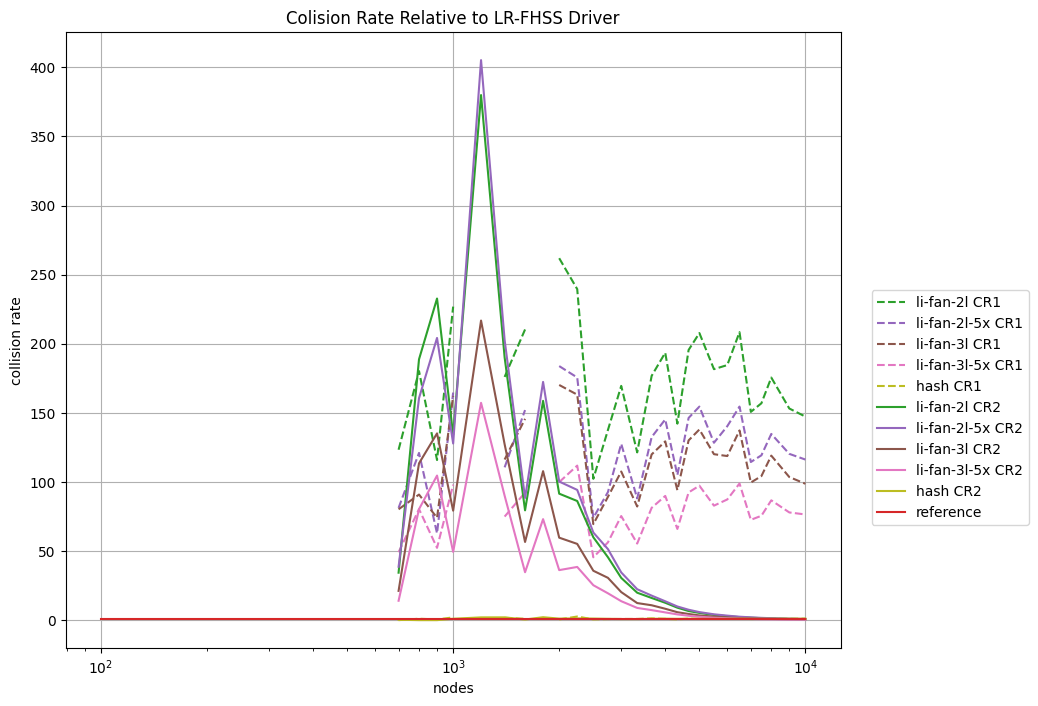

In [8]:
relColRateCR1 = datanLiFanCR[['li-fan-2l-CR1', 'li-fan-2l-5x-CR1', 'li-fan-3l-CR1', 'li-fan-3l-5x-CR1', 'hash-CR1', 'lr-fhss-driver-CR1']].to_numpy()
relColRateCR2 = datanLiFanCR[['li-fan-2l-CR2', 'li-fan-2l-5x-CR2', 'li-fan-3l-CR2', 'li-fan-3l-5x-CR1', 'hash-CR2', 'lr-fhss-driver-CR2']].to_numpy()

for i in range(datanLiFanCR.shape[0]): # same size for relColRateCR2
    relColRateCR1[i] /= relColRateCR1[i, -1]
    relColRateCR2[i] /= relColRateCR2[i, -1]

plt.figure(figsize=(10,8))

plt.plot(nodesLiFan, relColRateCR1[:,0], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,1], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,2], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,3], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,4], label=f'hash CR1', color='#bcbd22', linestyle='dashed')

plt.plot(nodesLiFan, relColRateCR2[:,0], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesLiFan, relColRateCR2[:,1], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesLiFan, relColRateCR2[:,2], label=f'li-fan-3l CR2', color='#8c564b')
plt.plot(nodesLiFan, relColRateCR2[:,3], label=f'li-fan-3l-5x CR2', color='#e377c2')
plt.plot(nodesLiFan, relColRateCR2[:,4], label=f'hash CR2', color='#bcbd22')

plt.plot(nodesLiFan, [1 for _ in range(len(nodesLiFan))],  label=f'reference', color='#d62728')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.ylim(0,3)
plt.grid()
plt.legend(loc=(1.04, 0.2))
plt.show()

---
# packet level collisions with granularity

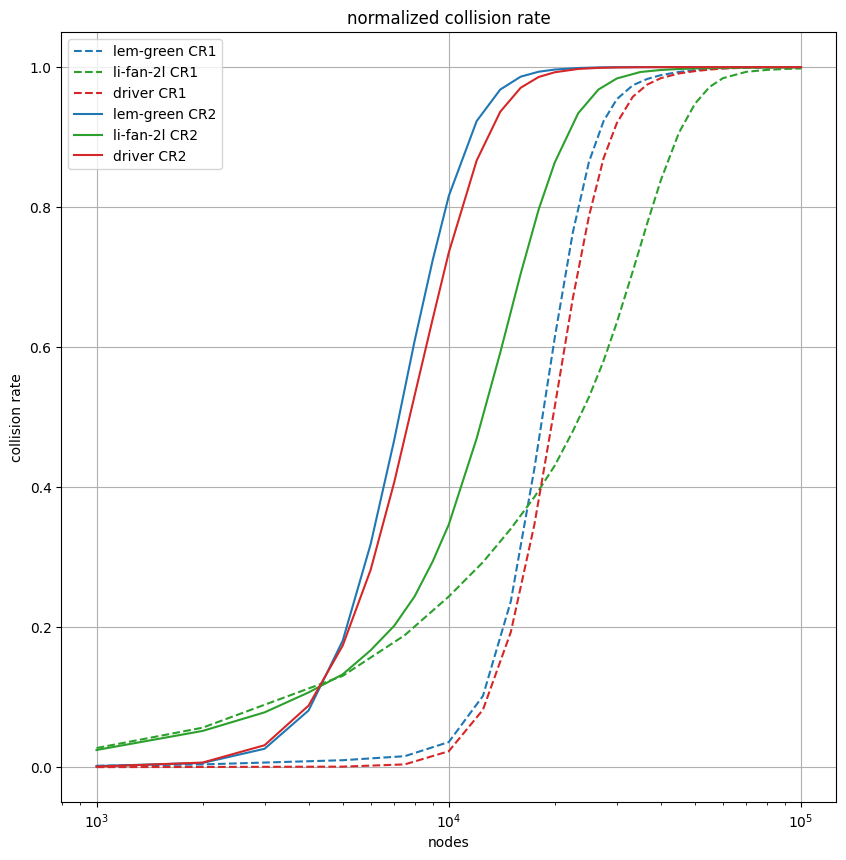

In [9]:
dataGranularity = pd.read_csv('results/dataGranularity.csv', index_col=0, header=None).T
nodesCR1 = dataGranularity['nodesCR1'].to_numpy()
nodesCR2 = dataGranularity['nodesCR2'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodesCR1, dataGranularity['lem-green-CR1'], label=f'lem-green CR1', color='#1f77b4', linestyle='dashed')
plt.plot(nodesCR1, dataGranularity['li-fan-2l-CR1'], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR1, dataGranularity['lr-fhss-driver-CR1'], label=f'driver CR1', color='#d62728', linestyle='dashed')

plt.plot(nodesCR2, dataGranularity['lem-green-CR2'], label=f'lem-green CR2', color='#1f77b4')
plt.plot(nodesCR2, dataGranularity['li-fan-2l-CR2'], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesCR2, dataGranularity['lr-fhss-driver-CR2'], label=f'driver CR2', color='#d62728')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

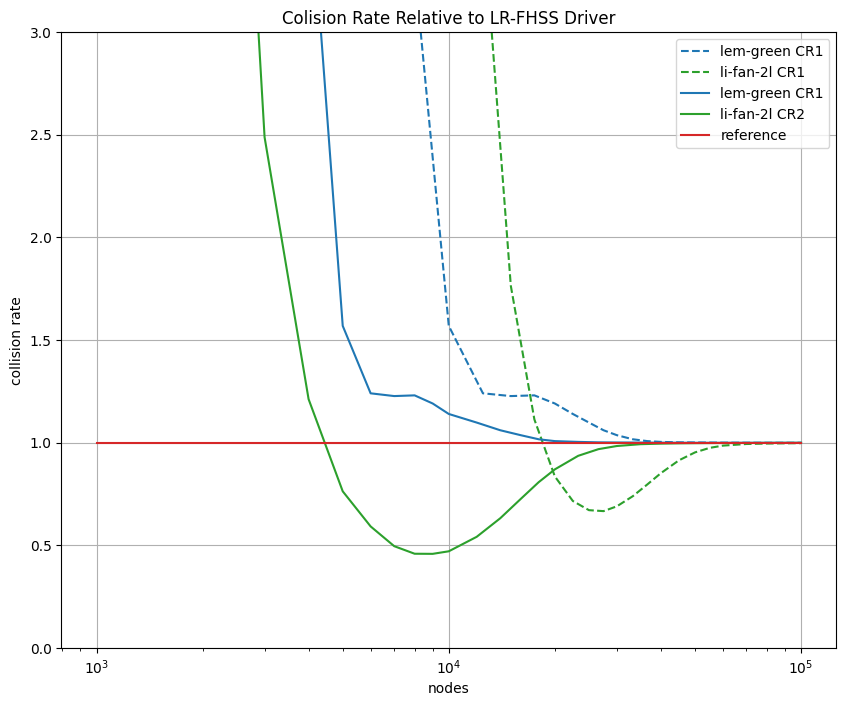

In [10]:
relColRateCR1 = dataGranularity[['lem-green-CR1', 'li-fan-2l-CR1', 'lr-fhss-driver-CR1']].to_numpy()
relColRateCR2 = dataGranularity[['lem-green-CR2', 'li-fan-2l-CR2', 'lr-fhss-driver-CR2']].to_numpy()

for i in range(dataGranularity.shape[0]): # same size for relColRateCR2
    relColRateCR1[i] /= relColRateCR1[i, -1]
    relColRateCR2[i] /= relColRateCR2[i, -1]

plt.figure(figsize=(10,8))

plt.plot(nodesCR1, relColRateCR1[:,0], label=f'lem-green CR1', color='#1f77b4', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,1], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')

plt.plot(nodesCR2, relColRateCR1[:,0], label=f'lem-green CR1', color='#1f77b4')
plt.plot(nodesCR2, relColRateCR2[:,1], label=f'li-fan-2l CR2', color='#2ca02c')

plt.plot(nodesCR1, [1 for _ in range(len(nodesCR1))],  label=f'reference', color='#d62728')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.ylim(0,3)
plt.grid()
plt.legend()
plt.show()

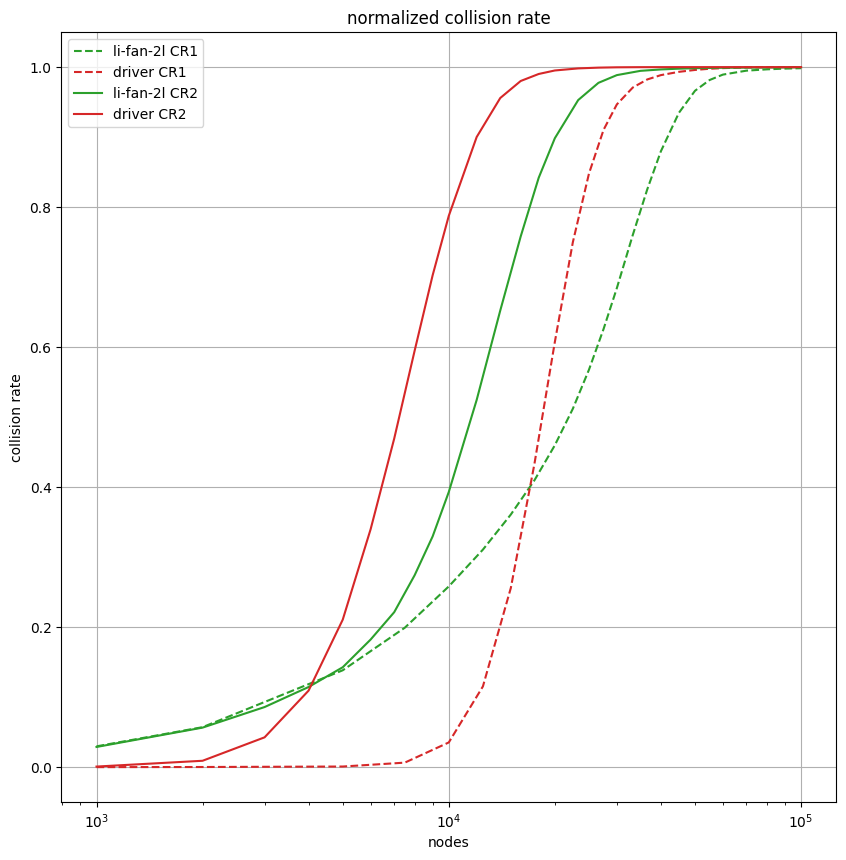

In [11]:
dataGranularityGR8 = pd.read_csv('results/dataGR8.csv', index_col=0, header=None).T
nodesCR1 = dataGranularityGR8['nodesCR1'].to_numpy()
nodesCR2 = dataGranularityGR8['nodesCR2'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodesCR1, dataGranularityGR8['li-fan-2l-CR1'], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR1, dataGranularityGR8['lr-fhss-driver-CR1'], label=f'driver CR1', color='#d62728', linestyle='dashed')

plt.plot(nodesCR2, dataGranularityGR8['li-fan-2l-CR2'], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesCR2, dataGranularityGR8['lr-fhss-driver-CR2'], label=f'driver CR2', color='#d62728')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

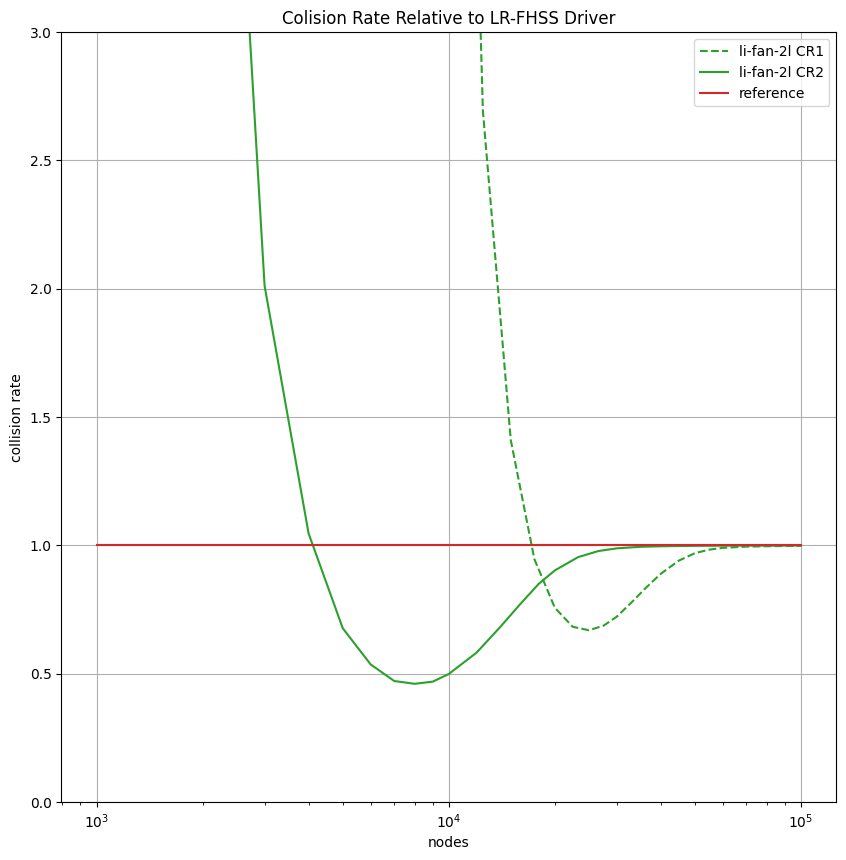

In [12]:
relColRateCR1 = dataGranularityGR8[['li-fan-2l-CR1', 'lr-fhss-driver-CR1']].to_numpy()
relColRateCR2 = dataGranularityGR8[['li-fan-2l-CR2', 'lr-fhss-driver-CR2']].to_numpy()

for i in range(dataGranularityGR8.shape[0]): # same size for relColRateCR2
    relColRateCR1[i] /= relColRateCR1[i, -1]
    relColRateCR2[i] /= relColRateCR2[i, -1]

plt.figure(figsize=(10,10))

plt.plot(nodesCR1, relColRateCR1[:,0], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR2, relColRateCR2[:,0], label=f'li-fan-2l CR2', color='#2ca02c')


plt.plot(nodesCR1, [1 for _ in range(len(nodesCR1))],  label=f'reference', color='#d62728')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.ylim(0,3)
plt.grid()
plt.legend()
plt.show()

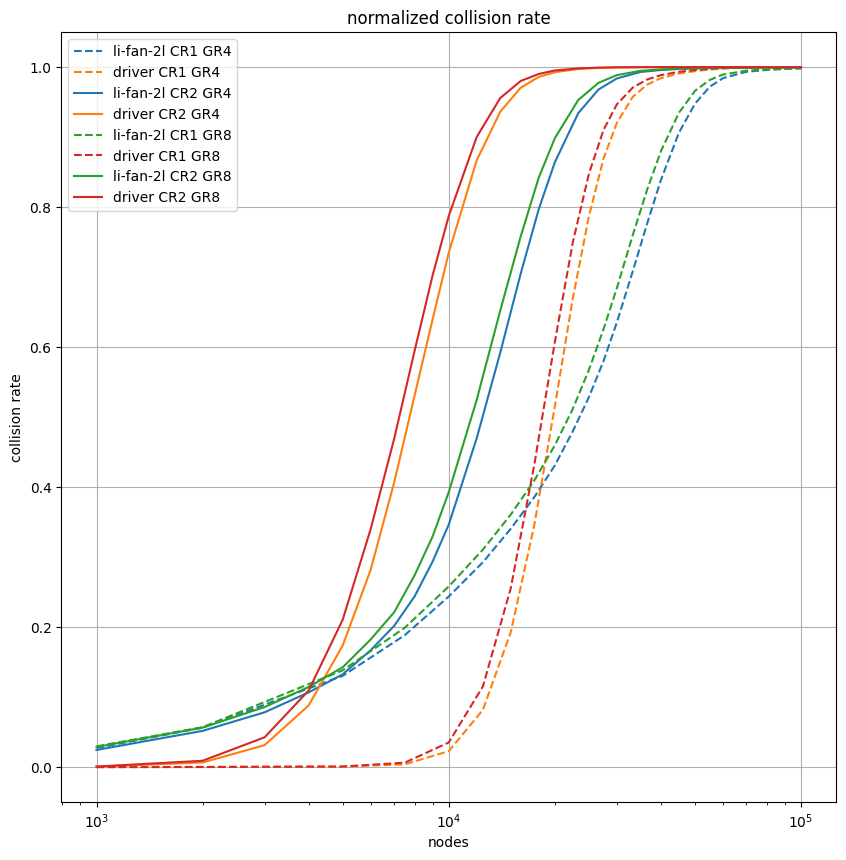

In [13]:
plt.figure(figsize=(10,10))

plt.plot(nodesCR1, dataGranularity['li-fan-2l-CR1'], label=f'li-fan-2l CR1 GR4', color='#1f77b4', linestyle='dashed')
plt.plot(nodesCR1, dataGranularity['lr-fhss-driver-CR1'], label=f'driver CR1 GR4', color='#ff7f0e', linestyle='dashed')

plt.plot(nodesCR2, dataGranularity['li-fan-2l-CR2'], label=f'li-fan-2l CR2 GR4', color='#1f77b4')
plt.plot(nodesCR2, dataGranularity['lr-fhss-driver-CR2'], label=f'driver CR2 GR4', color='#ff7f0e')

plt.plot(nodesCR1, dataGranularityGR8['li-fan-2l-CR1'], label=f'li-fan-2l CR1 GR8', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR1, dataGranularityGR8['lr-fhss-driver-CR1'], label=f'driver CR1 GR8', color='#d62728', linestyle='dashed')

plt.plot(nodesCR2, dataGranularityGR8['li-fan-2l-CR2'], label=f'li-fan-2l CR2 GR8', color='#2ca02c')
plt.plot(nodesCR2, dataGranularityGR8['lr-fhss-driver-CR2'], label=f'driver CR2 GR8', color='#d62728')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

---
# packet level collisions with granularity and limites processors CR1

#### duty cycle 25%


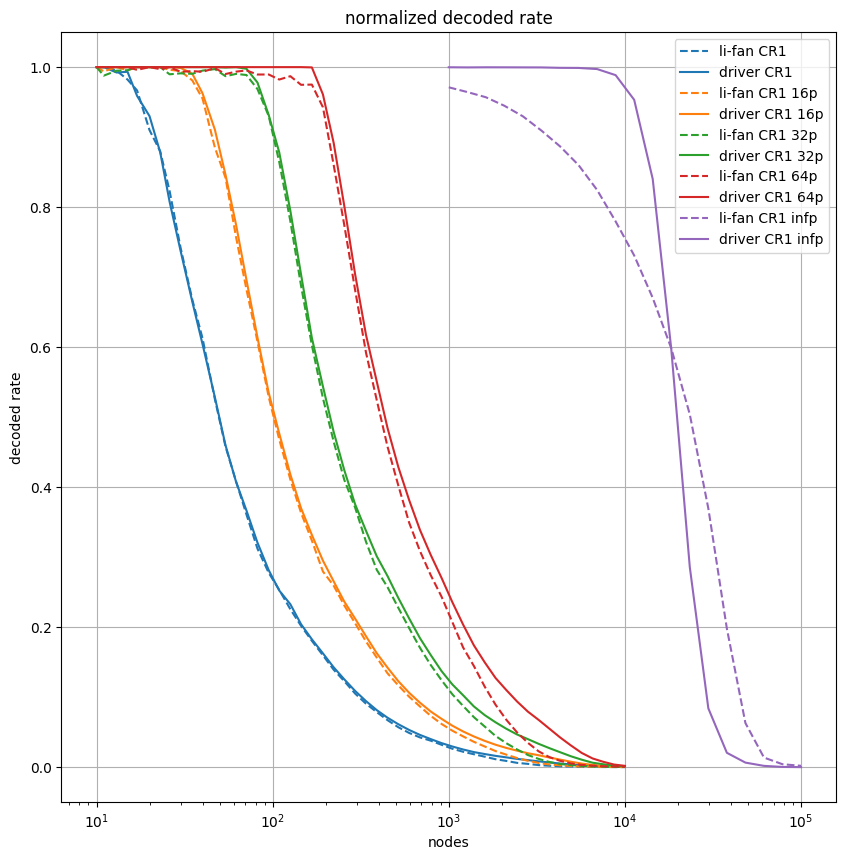

In [13]:
dataNetwork = pd.read_csv('results/dataNetwork.csv', index_col=0, header=None).T
nodes = dataNetwork['nodes'].to_numpy()
nodesinf = dataNetwork['nodesinf'].to_numpy()

lifan_CR1_infp = 1 - dataNetwork['li-fan-CR1-infp'].to_numpy()
lifan_CR2_infp = 1 - dataNetwork['li-fan-CR2-infp'].to_numpy()

driver_CR1_infp = 1 - dataNetwork['driver-CR1-infp'].to_numpy()
driver_CR2_infp = 1 - dataNetwork['driver-CR2-infp'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodes, dataNetwork['li-fan-CR1'], label=f'li-fan CR1', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, dataNetwork['driver-CR1'], label=f'driver CR1', color='#1f77b4')

plt.plot(nodes, dataNetwork['li-fan-CR1-16p'], label=f'li-fan CR1 16p', color='#ff7f0e', linestyle='dashed')
plt.plot(nodes, dataNetwork['driver-CR1-16p'], label=f'driver CR1 16p', color='#ff7f0e')

plt.plot(nodes, dataNetwork['li-fan-CR1-32p'], label=f'li-fan CR1 32p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, dataNetwork['driver-CR1-32p'], label=f'driver CR1 32p', color='#2ca02c')

plt.plot(nodes, dataNetwork['li-fan-CR1-64p'], label=f'li-fan CR1 64p', color='#d62728', linestyle='dashed')
plt.plot(nodes, dataNetwork['driver-CR1-64p'], label=f'driver CR1 64p', color='#d62728')

plt.plot(nodesinf, lifan_CR1_infp, label=f'li-fan CR1 infp', color='#9467bd', linestyle='dashed')
plt.plot(nodesinf, driver_CR1_infp, label=f'driver CR1 infp', color='#9467bd')

plt.title('normalized decoded rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

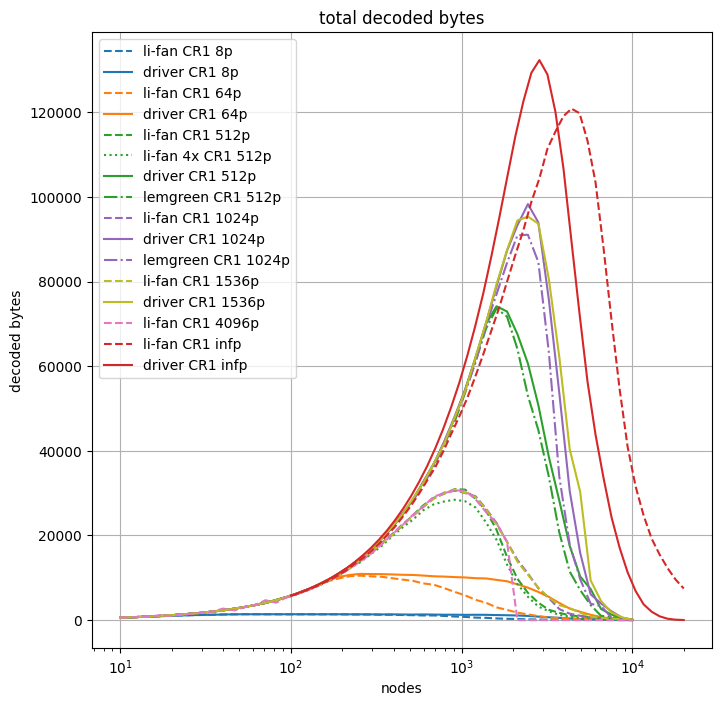

In [9]:
dataNetwork25DC = pd.read_csv('results/dataNetwork25DC.csv', index_col=0, header=None).T
nodes = dataNetwork25DC['nodes'].to_numpy()

nodesinf = dataNetwork25DC['nodesinf'].to_numpy()
lifan_CR1_infp_dec_rate = 1 - dataNetwork25DC['lifan-CR1-infp-col_rate'].to_numpy()
driver_CR1_infp_dec_rate = 1 - dataNetwork25DC['driver-CR1-infp-col_rate'].to_numpy()

lifan_CR1_infp_dec_bytes = np.multiply(nodesinf, lifan_CR1_infp_dec_rate) * 58
driver_CR1_infp_dec_bytes = np.multiply(nodesinf, driver_CR1_infp_dec_rate) * 58

plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork25DC['lifan-CR1-8p-dec_bytes'], label=f'li-fan CR1 8p', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, dataNetwork25DC['driver-CR1-8p-dec_bytes'], label=f'driver CR1 8p', color='#1f77b4')

plt.plot(nodes, dataNetwork25DC['lifan-CR1-64p-dec_bytes'], label=f'li-fan CR1 64p', color='#ff7f0e', linestyle='dashed')
plt.plot(nodes, dataNetwork25DC['driver-CR1-64p-dec_bytes'], label=f'driver CR1 64p', color='#ff7f0e')

plt.plot(nodes, dataNetwork25DC['lifan-CR1-512p-dec_bytes'], label=f'li-fan CR1 512p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, dataNetwork25DC['lifan-4x-CR1-512p-dec_bytes'], label=f'li-fan 4x CR1 512p', color='#2ca02c', linestyle='dotted')
plt.plot(nodes, dataNetwork25DC['driver-CR1-512p-dec_bytes'], label=f'driver CR1 512p', color='#2ca02c')
plt.plot(nodes, dataNetwork25DC['lemgreen-CR1-512p-dec_bytes'], label=f'lemgreen CR1 512p', color='#2ca02c', linestyle='dashdot')

plt.plot(nodes, dataNetwork25DC['lifan-CR1-1024p-dec_bytes'], label=f'li-fan CR1 1024p', color='#9467bd', linestyle='dashed')
plt.plot(nodes, dataNetwork25DC['driver-CR1-1024p-dec_bytes'], label=f'driver CR1 1024p', color='#9467bd')
plt.plot(nodes, dataNetwork25DC['lemgreen-CR1-1024p-dec_bytes'], label=f'lemgreen CR1 1024p', color='#9467bd', linestyle='dashdot')

plt.plot(nodes, dataNetwork25DC['lifan-CR1-1536p-dec_bytes'], label=f'li-fan CR1 1536p', color='#bcbd22', linestyle='dashed')
plt.plot(nodes, dataNetwork25DC['driver-CR1-1536p-dec_bytes'], label=f'driver CR1 1536p', color='#bcbd22')

#plt.plot(nodes, dataNetwork25DC['lifan-CR1-2048p-dec_bytes'], label=f'li-fan CR1 2048p', color='#e377c2', linestyle='dashed')
#plt.plot(nodes, dataNetwork25DC['driver-CR1-2048p-dec_bytes'], label=f'driver CR1 2048p', color='#e377c2')

plt.plot(nodes, dataNetwork25DC['lifan-CR1-4096p-dec_bytes'], label=f'li-fan CR1 4096p', color='#e377c2', linestyle='dashed')

plt.plot(nodesinf, lifan_CR1_infp_dec_bytes, label=f'li-fan CR1 infp', color='#d62728', linestyle='dashed')
plt.plot(nodesinf, driver_CR1_infp_dec_bytes, label=f'driver CR1 infp', color='#d62728')

plt.title('total decoded bytes')

plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded bytes')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

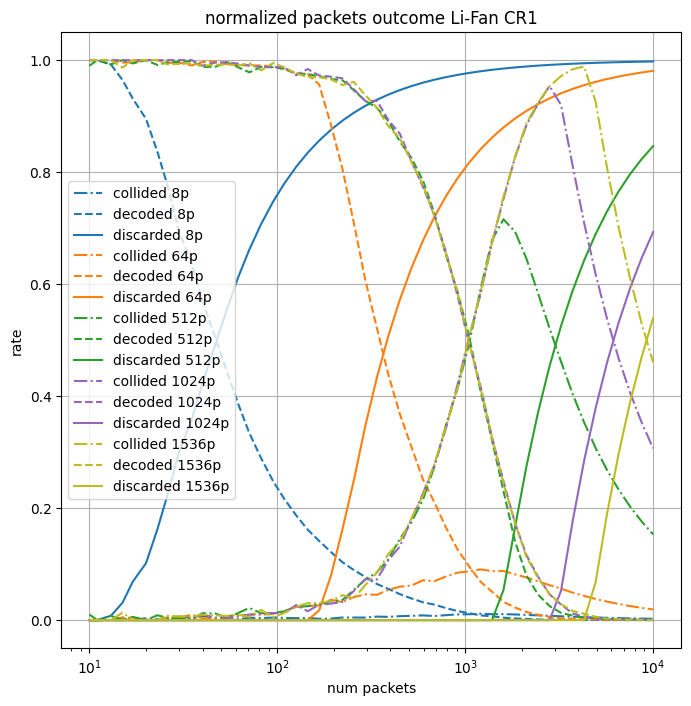

In [9]:
lifan_8p_col_pckts = dataNetwork25DC['lifan-CR1-8p-col_pckts'].to_numpy()
lifan_64p_col_pckts = dataNetwork25DC['lifan-CR1-64p-col_pckts'].to_numpy()
lifan_512p_col_pckts = dataNetwork25DC['lifan-CR1-512p-col_pckts'].to_numpy()
lifan_1024p_col_pckts = dataNetwork25DC['lifan-CR1-1024p-col_pckts'].to_numpy()
lifan_1536p_col_pckts = dataNetwork25DC['lifan-CR1-1536p-col_pckts'].to_numpy()

lifan_8p_dec_pckts = dataNetwork25DC['lifan-CR1-8p-dec_pckts'].to_numpy()
lifan_64p_dec_pckts = dataNetwork25DC['lifan-CR1-64p-dec_pckts'].to_numpy()
lifan_512p_dec_pckts = dataNetwork25DC['lifan-CR1-512p-dec_pckts'].to_numpy()
lifan_1024p_dec_pckts = dataNetwork25DC['lifan-CR1-1024p-dec_pckts'].to_numpy()
lifan_1536p_dec_pckts = dataNetwork25DC['lifan-CR1-1536p-dec_pckts'].to_numpy()

driver_8p_col_pckts = dataNetwork25DC['driver-CR1-8p-col_pckts'].to_numpy()
driver_64p_col_pckts = dataNetwork25DC['driver-CR1-64p-col_pckts'].to_numpy()
driver_512p_col_pckts = dataNetwork25DC['driver-CR1-512p-col_pckts'].to_numpy()
driver_1024p_col_pckts = dataNetwork25DC['driver-CR1-1024p-col_pckts'].to_numpy()
driver_1536p_col_pckts = dataNetwork25DC['driver-CR1-1536p-col_pckts'].to_numpy()

driver_8p_dec_pckts = dataNetwork25DC['driver-CR1-8p-dec_pckts'].to_numpy()
driver_64p_dec_pckts = dataNetwork25DC['driver-CR1-64p-dec_pckts'].to_numpy()
driver_512p_dec_pckts = dataNetwork25DC['driver-CR1-512p-dec_pckts'].to_numpy()
driver_1024p_dec_pckts = dataNetwork25DC['driver-CR1-1024p-dec_pckts'].to_numpy()
driver_1536p_dec_pckts = dataNetwork25DC['driver-CR1-1536p-dec_pckts'].to_numpy()


lifan_8p_discarded_pckts = nodes - lifan_8p_col_pckts - lifan_8p_dec_pckts
lifan_64p_discarded_pckts = nodes - lifan_64p_col_pckts - lifan_64p_dec_pckts
lifan_512p_discarded_pckts = nodes - lifan_512p_col_pckts - lifan_512p_dec_pckts
lifan_1024p_discarded_pckts = nodes - lifan_1024p_col_pckts - lifan_1024p_dec_pckts
lifan_1536p_discarded_pckts = nodes - lifan_1536p_col_pckts - lifan_1536p_dec_pckts

driver_8p_discarded_pckts = nodes - driver_8p_col_pckts - driver_8p_dec_pckts
driver_64p_discarded_pckts = nodes - driver_64p_col_pckts - driver_64p_dec_pckts
driver_512p_discarded_pckts = nodes - driver_512p_col_pckts - driver_512p_dec_pckts
driver_1024p_discarded_pckts = nodes - driver_1024p_col_pckts - driver_1024p_dec_pckts
driver_1536p_discarded_pckts = nodes - driver_1536p_col_pckts - driver_1536p_dec_pckts


plt.figure(figsize=(8,8))
plt.plot(nodes, np.divide(lifan_8p_col_pckts, nodes), label=f'collided 8p', color='#1f77b4', linestyle='dashdot')
plt.plot(nodes, np.divide(lifan_8p_dec_pckts, nodes), label=f'decoded 8p', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_8p_discarded_pckts, nodes), label=f'discarded 8p', color='#1f77b4')

plt.plot(nodes, np.divide(lifan_64p_col_pckts, nodes), label=f'collided 64p', color='#ff7f0e', linestyle='dashdot')
plt.plot(nodes, np.divide(lifan_64p_dec_pckts, nodes), label=f'decoded 64p', color='#ff7f0e', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_64p_discarded_pckts, nodes), label=f'discarded 64p', color='#ff7f0e')

plt.plot(nodes, np.divide(lifan_512p_col_pckts, nodes), label=f'collided 512p', color='#2ca02c', linestyle='dashdot')
plt.plot(nodes, np.divide(lifan_512p_dec_pckts, nodes), label=f'decoded 512p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_512p_discarded_pckts, nodes), label=f'discarded 512p', color='#2ca02c')

plt.plot(nodes, np.divide(lifan_1024p_col_pckts, nodes), label=f'collided 1024p', color='#9467bd', linestyle='dashdot')
plt.plot(nodes, np.divide(lifan_1024p_dec_pckts, nodes), label=f'decoded 1024p', color='#9467bd', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_1024p_discarded_pckts, nodes), label=f'discarded 1024p', color='#9467bd')

plt.plot(nodes, np.divide(lifan_1536p_col_pckts, nodes), label=f'collided 1536p', color='#bcbd22', linestyle='dashdot')
plt.plot(nodes, np.divide(lifan_1536p_dec_pckts, nodes), label=f'decoded 1536p', color='#bcbd22', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_1536p_discarded_pckts, nodes), label=f'discarded 1536p', color='#bcbd22')


plt.title('normalized packets outcome Li-Fan CR1')
plt.xlabel('num packets')
plt.xscale('log')
plt.ylabel('rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

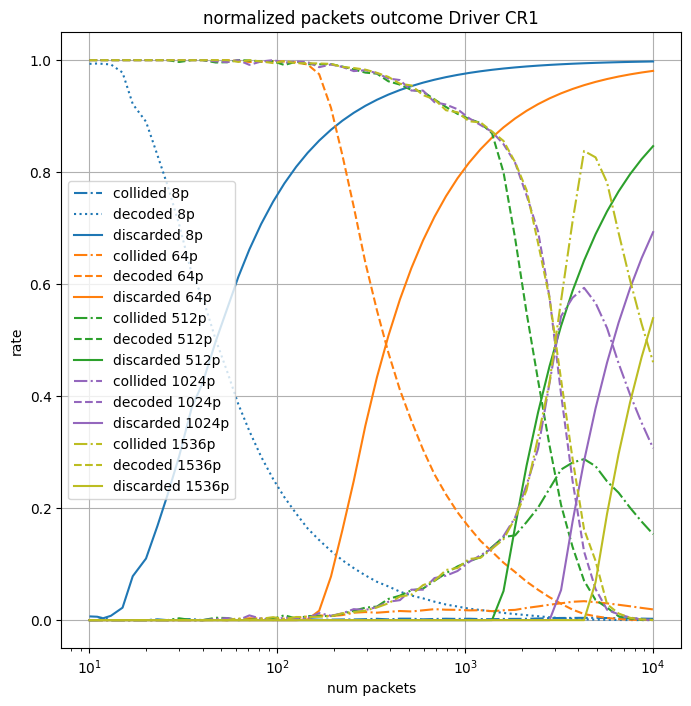

In [10]:
plt.figure(figsize=(8,8))
plt.plot(nodes, np.divide(driver_8p_col_pckts, nodes), label=f'collided 8p', color='#1f77b4', linestyle='dashdot')
plt.plot(nodes, np.divide(driver_8p_dec_pckts, nodes), label=f'decoded 8p', color='#1f77b4', linestyle='dotted')
plt.plot(nodes, np.divide(driver_8p_discarded_pckts, nodes), label=f'discarded 8p', color='#1f77b4')

plt.plot(nodes, np.divide(driver_64p_col_pckts, nodes), label=f'collided 64p', color='#ff7f0e', linestyle='dashdot')
plt.plot(nodes, np.divide(driver_64p_dec_pckts, nodes), label=f'decoded 64p', color='#ff7f0e', linestyle='dashed')
plt.plot(nodes, np.divide(driver_64p_discarded_pckts, nodes), label=f'discarded 64p', color='#ff7f0e')

plt.plot(nodes, np.divide(driver_512p_col_pckts, nodes), label=f'collided 512p', color='#2ca02c', linestyle='dashdot')
plt.plot(nodes, np.divide(driver_512p_dec_pckts, nodes), label=f'decoded 512p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, np.divide(driver_512p_discarded_pckts, nodes), label=f'discarded 512p', color='#2ca02c')

plt.plot(nodes, np.divide(driver_1024p_col_pckts, nodes), label=f'collided 1024p', color='#9467bd', linestyle='dashdot')
plt.plot(nodes, np.divide(driver_1024p_dec_pckts, nodes), label=f'decoded 1024p', color='#9467bd', linestyle='dashed')
plt.plot(nodes, np.divide(driver_1024p_discarded_pckts, nodes), label=f'discarded 1024p', color='#9467bd')

plt.plot(nodes, np.divide(driver_1536p_col_pckts, nodes), label=f'collided 1536p', color='#bcbd22', linestyle='dashdot')
plt.plot(nodes, np.divide(driver_1536p_dec_pckts, nodes), label=f'decoded 1536p', color='#bcbd22', linestyle='dashed')
plt.plot(nodes, np.divide(driver_1536p_discarded_pckts, nodes), label=f'discarded 1536p', color='#bcbd22')

plt.title('normalized packets outcome Driver CR1')
plt.xlabel('num packets')
plt.xscale('log')
plt.ylabel('rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

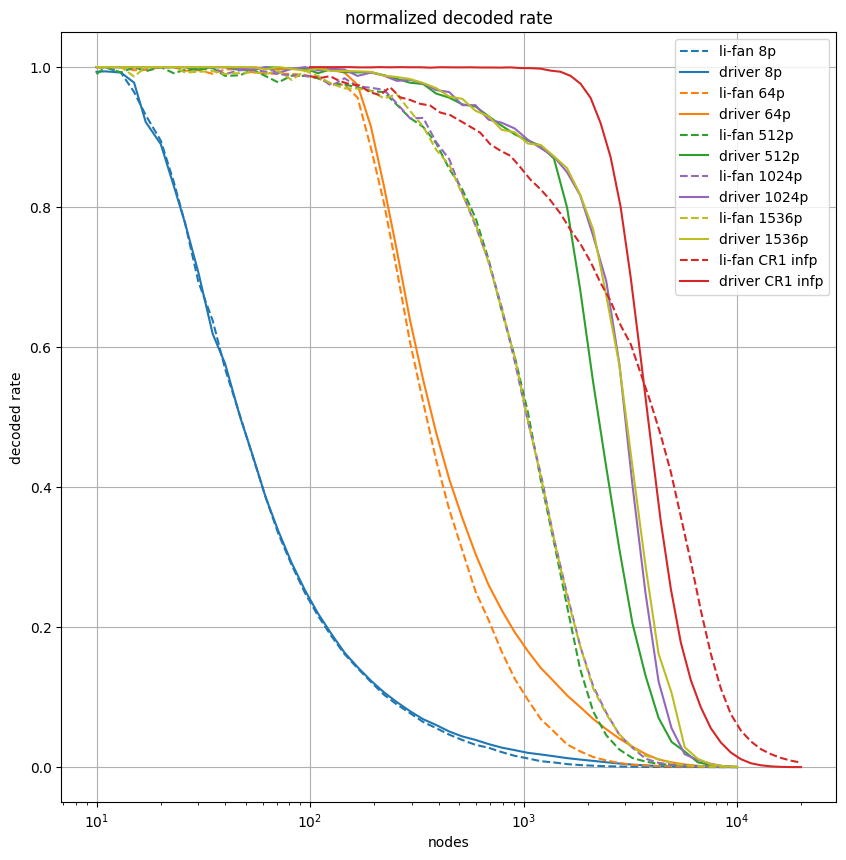

In [11]:
plt.figure(figsize=(10,10))

plt.plot(nodes, np.divide(lifan_8p_dec_pckts, nodes), label=f'li-fan 8p', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, np.divide(driver_8p_dec_pckts, nodes), label=f'driver 8p', color='#1f77b4')

plt.plot(nodes, np.divide(lifan_64p_dec_pckts, nodes), label=f'li-fan 64p', color='#ff7f0e', linestyle='dashed')
plt.plot(nodes, np.divide(driver_64p_dec_pckts, nodes), label=f'driver 64p', color='#ff7f0e')

plt.plot(nodes, np.divide(lifan_512p_dec_pckts, nodes), label=f'li-fan 512p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, np.divide(driver_512p_dec_pckts, nodes), label=f'driver 512p', color='#2ca02c')

plt.plot(nodes, np.divide(lifan_1024p_dec_pckts, nodes), label=f'li-fan 1024p', color='#9467bd', linestyle='dashed')
plt.plot(nodes, np.divide(driver_1024p_dec_pckts, nodes), label=f'driver 1024p', color='#9467bd')

plt.plot(nodes, np.divide(lifan_1536p_dec_pckts, nodes), label=f'li-fan 1536p', color='#bcbd22', linestyle='dashed')
plt.plot(nodes, np.divide(driver_1536p_dec_pckts, nodes), label=f'driver 1536p', color='#bcbd22')

plt.plot(nodesinf, lifan_CR1_infp_dec_rate, label=f'li-fan CR1 infp', color='#d62728', linestyle='dashed')
plt.plot(nodesinf, driver_CR1_infp_dec_rate, label=f'driver CR1 infp', color='#d62728')

plt.title('normalized decoded rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

#### duty cycle 1%

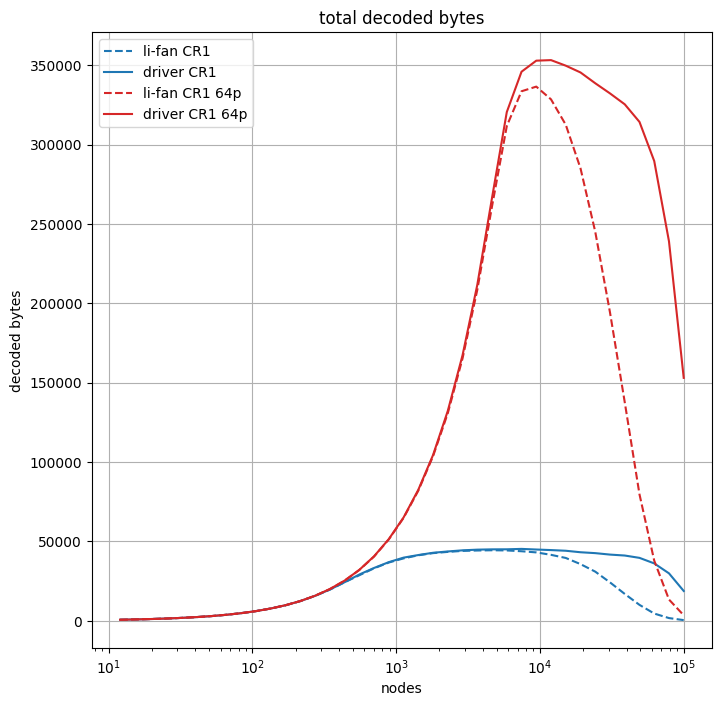

In [4]:
dataNetwork1DC = pd.read_csv('results/dataNetwork1DC2.csv', index_col=0, header=None).T
nodes = dataNetwork1DC['nodes'].to_numpy()

plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork1DC['lifan-CR1-PR8-dec_bytes'], label=f'li-fan CR1', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, dataNetwork1DC['driver-CR1-PR8-dec_bytes'], label=f'driver CR1', color='#1f77b4')

plt.plot(nodes, dataNetwork1DC['lifan-CR1-PR64-dec_bytes'], label=f'li-fan CR1 64p', color='#d62728', linestyle='dashed')
plt.plot(nodes, dataNetwork1DC['driver-CR1-PR64-dec_bytes'], label=f'driver CR1 64p', color='#d62728')


plt.title('total decoded bytes')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded bytes')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

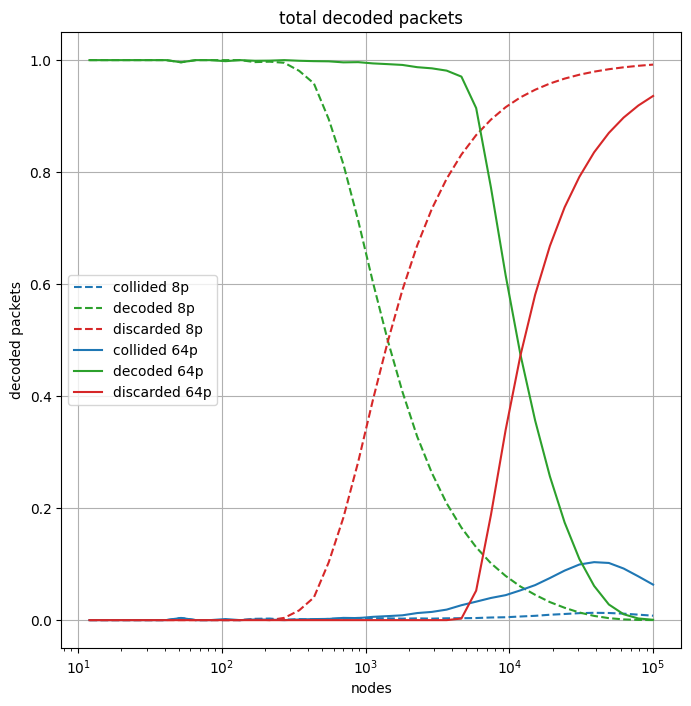

In [32]:
plt.figure(figsize=(8,8))

lifan_PR8_col_pckts = dataNetwork1DC['lifan-CR1-PR8-col_pckts'].to_numpy()
lifan_PR64_col_pckts = dataNetwork1DC['lifan-CR1-PR64-col_pckts'].to_numpy()

driver_PR8_col_pckts = dataNetwork1DC['driver-CR1-PR8-col_pckts'].to_numpy()
driver_PR64_col_pckts = dataNetwork1DC['driver-CR1-PR64-col_pckts'].to_numpy()

lifan_PR8_dec_pckts = dataNetwork1DC['lifan-CR1-PR8-dec_pckts'].to_numpy()
lifan_PR64_dec_pckts = dataNetwork1DC['lifan-CR1-PR64-dec_pckts'].to_numpy()

driver_PR8_dec_pckts = dataNetwork1DC['driver-CR1-PR8-dec_pckts'].to_numpy()
driver_PR64_dec_pckts = dataNetwork1DC['driver-CR1-PR64-dec_pckts'].to_numpy()

lifan_PR8_discarded_pckts = nodes - lifan_PR8_col_pckts - lifan_PR8_dec_pckts
lifan_PR64_discarded_pckts = nodes - lifan_PR64_col_pckts - lifan_PR64_dec_pckts

driver_PR8_discarded_pckts = nodes - driver_PR8_col_pckts - driver_PR8_dec_pckts
driver_PR64_discarded_pckts = nodes - driver_PR64_col_pckts - driver_PR64_dec_pckts


plt.plot(nodes, np.divide(lifan_PR8_col_pckts, nodes), label=f'collided 8p', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_PR8_dec_pckts, nodes), label=f'decoded 8p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_PR8_discarded_pckts, nodes), label=f'discarded 8p', color='#d62728', linestyle='dashed')

#plt.plot(nodes, dataNetwork1DC['driver-CR1-PR8-col_pckts'], label=f'driver CR1', color='#1f77b4')

plt.plot(nodes, np.divide(lifan_PR64_col_pckts, nodes), label=f'collided 64p', color='#1f77b4')
plt.plot(nodes, np.divide(lifan_PR64_dec_pckts, nodes), label=f'decoded 64p', color='#2ca02c')
plt.plot(nodes, np.divide(lifan_PR64_discarded_pckts, nodes), label=f'discarded 64p', color='#d62728')

#plt.plot(nodes, dataNetwork1DC['driver-CR1-PR64-col_pckts'], label=f'driver CR1 64p', color='#d62728')


plt.title('total decoded packets')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

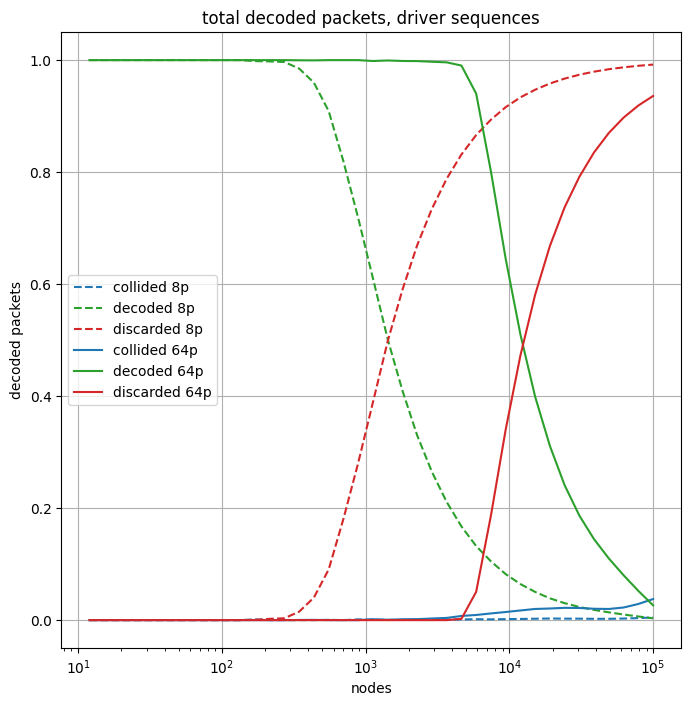

In [33]:
plt.figure(figsize=(8,8))

plt.plot(nodes, np.divide(driver_PR8_col_pckts, nodes), label=f'collided 8p', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, np.divide(driver_PR8_dec_pckts, nodes), label=f'decoded 8p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, np.divide(driver_PR8_discarded_pckts, nodes), label=f'discarded 8p', color='#d62728', linestyle='dashed')

#plt.plot(nodes, dataNetwork1DC['driver-CR1-PR8-col_pckts'], label=f'driver CR1', color='#1f77b4')

plt.plot(nodes, np.divide(driver_PR64_col_pckts, nodes), label=f'collided 64p', color='#1f77b4')
plt.plot(nodes, np.divide(driver_PR64_dec_pckts, nodes), label=f'decoded 64p', color='#2ca02c')
plt.plot(nodes, np.divide(driver_PR64_discarded_pckts, nodes), label=f'discarded 64p', color='#d62728')

#plt.plot(nodes, dataNetwork1DC['driver-CR1-PR64-col_pckts'], label=f'driver CR1 64p', color='#d62728')


plt.title('total decoded packets, driver sequences')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

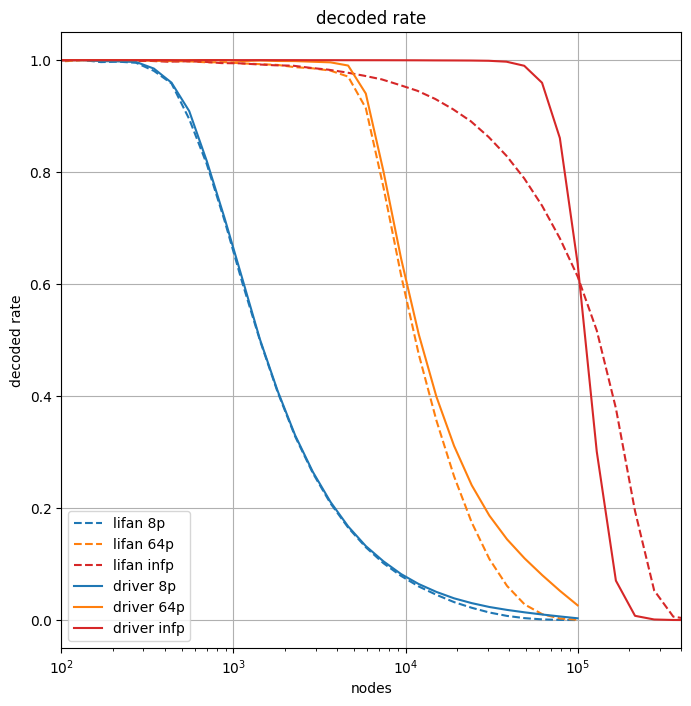

In [34]:
dataNetwork1DCinf = pd.read_csv('results/dataNetwork1DCinf.csv', index_col=0, header=None).T
nodesinf = dataNetwork1DCinf['nodesinf'].to_numpy()

lifan_CR1_infp = 1 - dataNetwork1DCinf['lifan-CR1-infp'].to_numpy()
driver_CR1_infp = 1 - dataNetwork1DCinf['driver-CR1-infp'].to_numpy()

plt.figure(figsize=(8,8))

plt.plot(nodes, np.divide(lifan_PR8_dec_pckts, nodes), label=f'lifan 8p', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, np.divide(lifan_PR64_dec_pckts, nodes), label=f'lifan 64p', color='#ff7f0e', linestyle='dashed')
plt.plot(nodesinf, lifan_CR1_infp, label=f'lifan infp', color='#d62728', linestyle='dashed')

plt.plot(nodes, np.divide(driver_PR8_dec_pckts, nodes), label=f'driver 8p', color='#1f77b4')
plt.plot(nodes, np.divide(driver_PR64_dec_pckts, nodes), label=f'driver 64p', color='#ff7f0e')
plt.plot(nodesinf, driver_CR1_infp, label=f'driver infp', color='#d62728')

plt.title('decoded rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded rate')
plt.xlim(1e2,4e5)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

---
# packet level collisions with limited processors CR2

#### duty cycle 25%


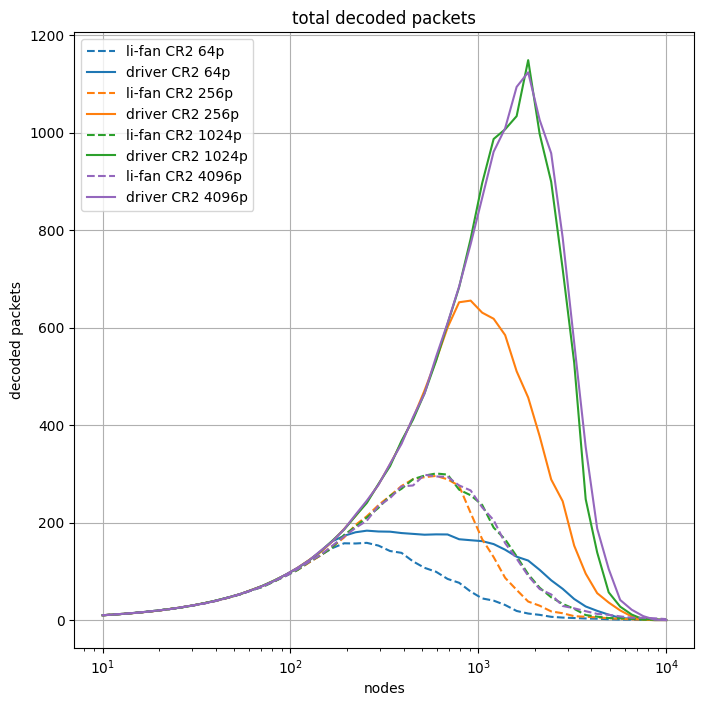

In [5]:
dataNetwork25DCCR2 = pd.read_csv('results/dataNetwork-25DC-CR2.csv', index_col=0, header=None).T
nodes = dataNetwork25DCCR2['nodes'].to_numpy()

#nodesinf = dataNetwork25DC['nodesinf'].to_numpy()
#lifan_CR1_infp_dec_rate = 1 - dataNetwork25DC['lifan-CR1-infp-col_rate'].to_numpy()
#driver_CR1_infp_dec_rate = 1 - dataNetwork25DC['driver-CR1-infp-col_rate'].to_numpy()

#lifan_CR1_infp_dec_bytes = np.multiply(nodesinf, lifan_CR1_infp_dec_rate) * 58
#driver_CR1_infp_dec_bytes = np.multiply(nodesinf, driver_CR1_infp_dec_rate) * 58

plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork25DCCR2['lifan-CR2-64p-dec_pckts'], label=f'li-fan CR2 64p', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, dataNetwork25DCCR2['driver-CR2-64p-dec_pckts'], label=f'driver CR2 64p', color='#1f77b4')

plt.plot(nodes, dataNetwork25DCCR2['lifan-CR2-256p-dec_pckts'], label=f'li-fan CR2 256p', color='#ff7f0e', linestyle='dashed')
plt.plot(nodes, dataNetwork25DCCR2['driver-CR2-256p-dec_pckts'], label=f'driver CR2 256p', color='#ff7f0e')

plt.plot(nodes, dataNetwork25DCCR2['lifan-CR2-1024p-dec_pckts'], label=f'li-fan CR2 1024p', color='#2ca02c', linestyle='dashed')
plt.plot(nodes, dataNetwork25DCCR2['driver-CR2-1024p-dec_pckts'], label=f'driver CR2 1024p', color='#2ca02c')

plt.plot(nodes, dataNetwork25DCCR2['lifan-CR2-4096p-dec_pckts'], label=f'li-fan CR2 4096p', color='#9467bd', linestyle='dashed')
plt.plot(nodes, dataNetwork25DCCR2['driver-CR2-4096p-dec_pckts'], label=f'driver CR2 4096p', color='#9467bd')

plt.title('total decoded packets')

plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

---
# packet level collisions with CR2 and packet drop

#### duty cycle 25%

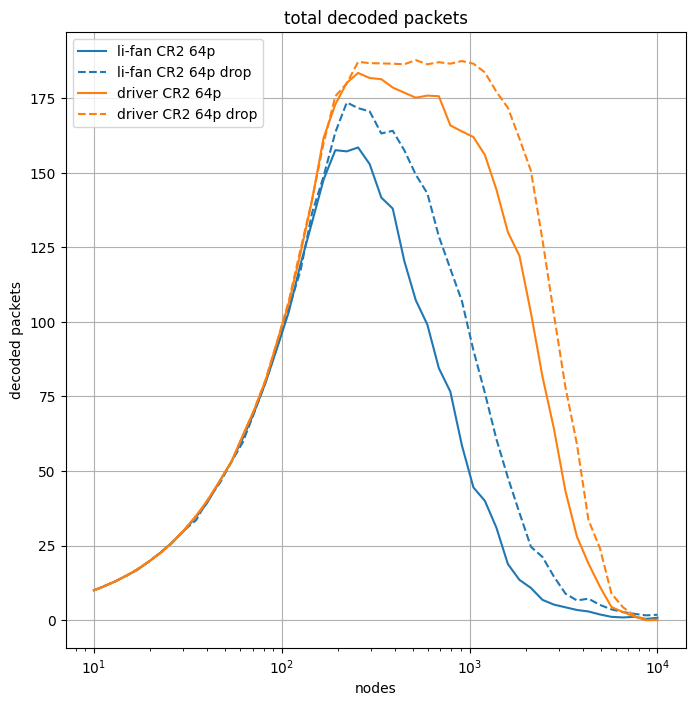

In [7]:
dataNetwork25DCCR2drop = pd.read_csv('results/dataNetwork-25DC-CR2-drop.csv', index_col=0, header=None).T
plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork25DCCR2['lifan-CR2-64p-dec_pckts'], label=f'li-fan CR2 64p', color='#1f77b4')
plt.plot(nodes, dataNetwork25DCCR2drop['lifan-CR2-64p-dec_pckts'], label=f'li-fan CR2 64p drop', color='#1f77b4', linestyle='dashed')

plt.plot(nodes, dataNetwork25DCCR2['driver-CR2-64p-dec_pckts'], label=f'driver CR2 64p', color='#ff7f0e')
plt.plot(nodes, dataNetwork25DCCR2drop['driver-CR2-64p-dec_pckts'], label=f'driver CR2 64p drop', color='#ff7f0e', linestyle='dashed')

#plt.plot(nodes, dataNetwork25DCCR2['lifan-CR2-1024p-dec_pckts'], label=f'li-fan CR2 1024p', color='#2ca02c')
#plt.plot(nodes, dataNetwork25DCCR2drop['lifan-CR2-1024p-dec_pckts'], label=f'li-fan CR2 1024p drop', color='#2ca02c', linestyle='dashed')

#plt.plot(nodes, dataNetwork25DCCR2['driver-CR2-1024p-dec_pckts'], label=f'driver CR2 1024p', color='#9467bd')
#plt.plot(nodes, dataNetwork25DCCR2drop['driver-CR2-1024p-dec_pckts'], label=f'driver CR2 1024p drop', color='#9467bd', linestyle='dashed')

plt.title('total decoded packets CR2')

plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

---
# packet level collisions with packet drop and early decode

#### duty cycle 25%

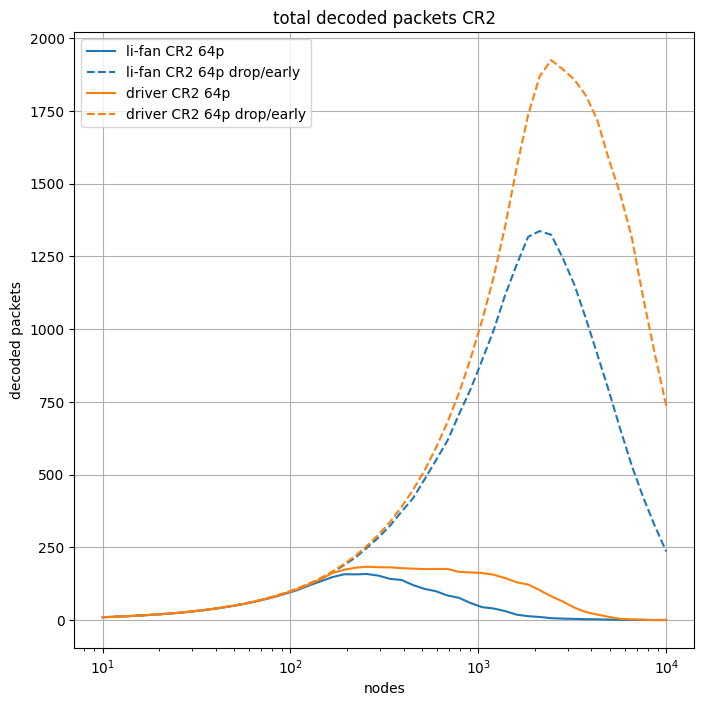

In [12]:
dataNetwork25DCCR2dropearly = pd.read_csv('results/dataNetwork-25DC-CR2-drop-earlydecode.csv', index_col=0, header=None).T
plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork25DCCR2['lifan-CR2-64p-dec_pckts'], label=f'li-fan CR2 64p', color='#1f77b4')
plt.plot(nodes, dataNetwork25DCCR2dropearly['lifan-CR2-64p-dec_pckts'], label=f'li-fan CR2 64p drop/early', color='#1f77b4', linestyle='dashed')

plt.plot(nodes, dataNetwork25DCCR2['driver-CR2-64p-dec_pckts'], label=f'driver CR2 64p', color='#ff7f0e')
plt.plot(nodes, dataNetwork25DCCR2dropearly['driver-CR2-64p-dec_pckts'], label=f'driver CR2 64p drop/early', color='#ff7f0e', linestyle='dashed')

plt.title('total decoded packets CR2')

plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

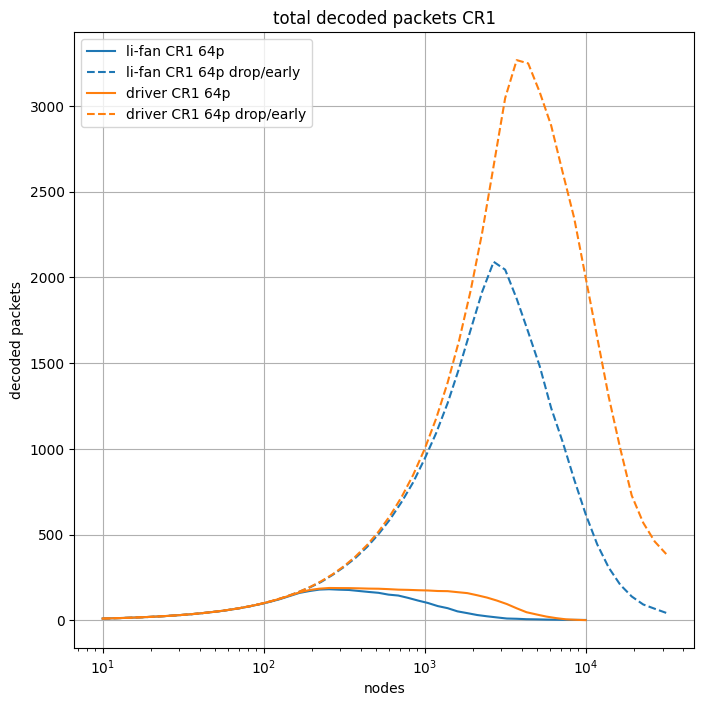

In [14]:
dataNetwork25DCCR2dropearly2 = pd.read_csv('results/dataNetwork-25DC-CR2-drop-earlydecode2.csv', index_col=0, header=None).T
nodes2 = dataNetwork25DCCR2dropearly2['nodes'].to_numpy()

plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork25DC['lifan-CR1-64p-dec_pckts'], label=f'li-fan CR1 64p', color='#1f77b4')
#plt.plot(nodes, dataNetwork25DCCR2dropearly['lifan-CR1-64p-dec_pckts'], label=f'li-fan CR1 64p drop/early', color='#1f77b4', linestyle='dashed')
plt.plot(nodes2, dataNetwork25DCCR2dropearly2['lifan-CR1-64p-dec_pckts'], label=f'li-fan CR1 64p drop/early', color='#1f77b4', linestyle='dashed')

plt.plot(nodes, dataNetwork25DC['driver-CR1-64p-dec_pckts'], label=f'driver CR1 64p', color='#ff7f0e')
#plt.plot(nodes, dataNetwork25DCCR2dropearly['driver-CR1-64p-dec_pckts'], label=f'driver CR1 64p drop/early', color='#ff7f0e', linestyle='dashed')
plt.plot(nodes2, dataNetwork25DCCR2dropearly2['driver-CR1-64p-dec_pckts'], label=f'driver CR1 64p drop/early', color='#ff7f0e', linestyle='dashed')

plt.title('total decoded packets CR1')

plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

---
# 100p packet level collisions with packet drop and early decode

#### duty cycle 25%

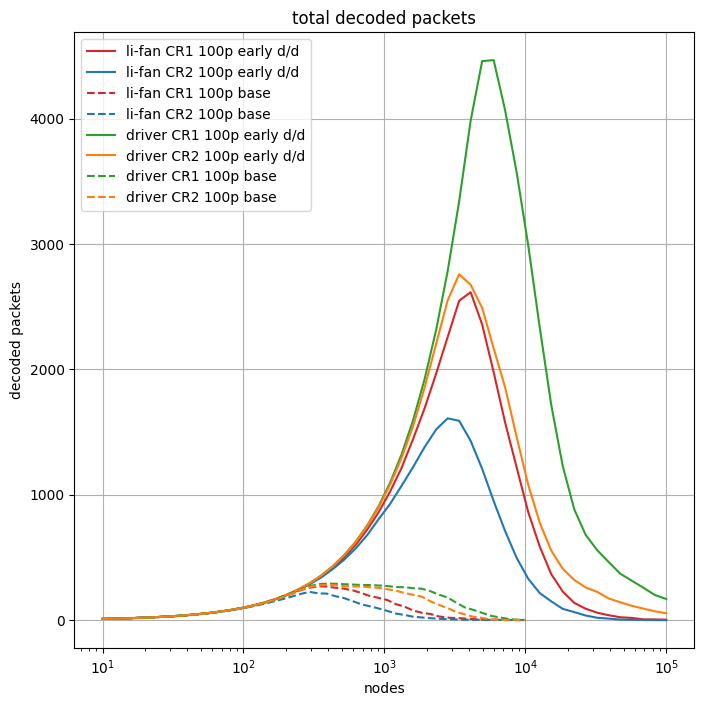

In [4]:
dataNetwork100p = pd.read_csv('results/data-100p-25DC.csv', index_col=0, header=None).T
nodes = dataNetwork100p['nodes'].to_numpy()
nodes2 = dataNetwork100p['nodes2'].to_numpy()

plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork100p['lifan-CR1-100p-dec_pckts'], label=f'li-fan CR1 100p early d/d', color='#d62728')
plt.plot(nodes, dataNetwork100p['lifan-CR2-100p-dec_pckts'], label=f'li-fan CR2 100p early d/d', color='#1f77b4')
plt.plot(nodes2, dataNetwork100p['lifan-CR1-100p-dec_pckts-base'], label=f'li-fan CR1 100p base', color='#d62728', linestyle='dashed')
plt.plot(nodes2, dataNetwork100p['lifan-CR2-100p-dec_pckts-base'], label=f'li-fan CR2 100p base', color='#1f77b4', linestyle='dashed')

plt.plot(nodes, dataNetwork100p['driver-CR1-100p-dec_pckts'], label=f'driver CR1 100p early d/d', color='#2ca02c')
plt.plot(nodes, dataNetwork100p['driver-CR2-100p-dec_pckts'], label=f'driver CR2 100p early d/d', color='#ff7f0e')
plt.plot(nodes2, dataNetwork100p['driver-CR1-100p-dec_pckts-base'], label=f'driver CR1 100p base', color='#2ca02c', linestyle='dashed')
plt.plot(nodes2, dataNetwork100p['driver-CR2-100p-dec_pckts-base'], label=f'driver CR2 100p base', color='#ff7f0e', linestyle='dashed')

plt.title('total decoded packets')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

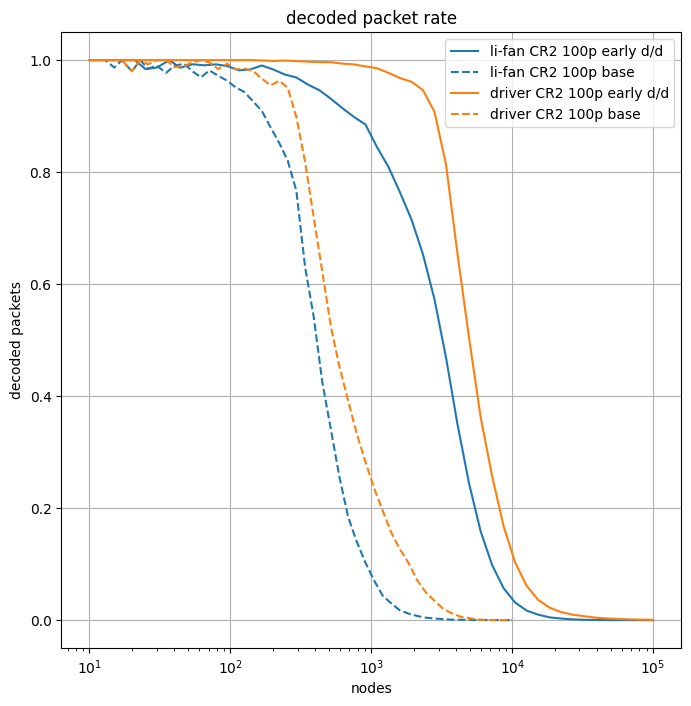

In [5]:
plt.figure(figsize=(8,8))

plt.plot(nodes, np.divide(dataNetwork100p['lifan-CR2-100p-dec_pckts'],nodes), label=f'li-fan CR2 100p early d/d', color='#1f77b4')
#plt.plot(nodes, np.divide(dataNetwork100p['lifan-CR1-100p-dec_pckts'],nodes), label=f'li-fan CR1 100p', color='#1f77b4', linestyle='dashdot')
plt.plot(nodes2, np.divide(dataNetwork100p['lifan-CR2-100p-dec_pckts-base'],nodes2), label=f'li-fan CR2 100p base', color='#1f77b4', linestyle='dashed')

plt.plot(nodes, np.divide(dataNetwork100p['driver-CR2-100p-dec_pckts'],nodes), label=f'driver CR2 100p early d/d', color='#ff7f0e')
#plt.plot(nodes, np.divide(dataNetwork100p['driver-CR1-100p-dec_pckts'],nodes), label=f'driver CR1 100p', color='#ff7f0e', linestyle='dashdot')
plt.plot(nodes2, np.divide(dataNetwork100p['driver-CR2-100p-dec_pckts-base'],nodes2), label=f'driver CR2 100p base', color='#ff7f0e', linestyle='dashed')

plt.title('decoded packet rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

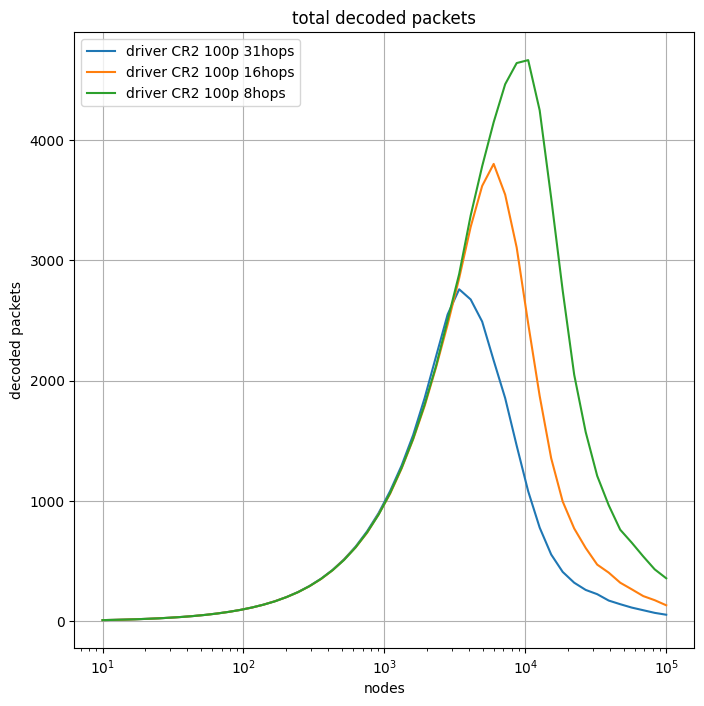

In [6]:
plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork100p['driver-CR2-100p-dec_pckts'], label=f'driver CR2 100p 31hops', color='#1f77b4')
plt.plot(nodes, dataNetwork100p['driver-CR2-100p-16hop-dec_pckts'], label=f'driver CR2 100p 16hops', color='#ff7f0e')
plt.plot(nodes, dataNetwork100p['driver-CR2-100p-8hop-dec_pckts'], label=f'driver CR2 100p 8hops', color='#2ca02c')

plt.title('total decoded packets')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

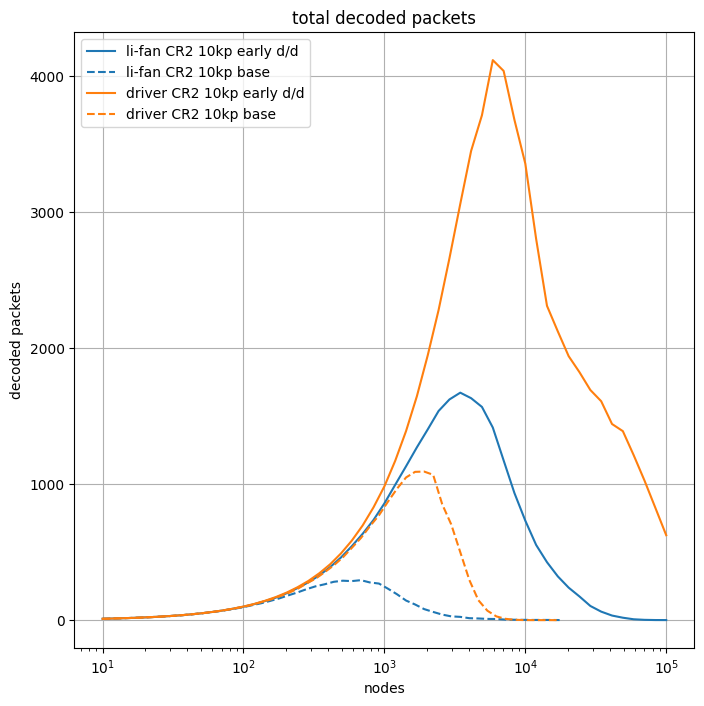

In [15]:
dataNetwork10kp = pd.read_csv('results/data-10kp-25DC.csv', index_col=0, header=None).T
nodes = dataNetwork10kp['nodes'].to_numpy()
nodes2 = dataNetwork10kp['nodes2'].to_numpy()

plt.figure(figsize=(8,8))

plt.plot(nodes, dataNetwork10kp['lifan-CR2-10kp-dec_pckts'], label=f'li-fan CR2 10kp early d/d', color='#1f77b4')
plt.plot(nodes2, dataNetwork10kp['lifan-CR2-10kp-dec_pckts-base'], label=f'li-fan CR2 10kp base', color='#1f77b4', linestyle='dashed')

plt.plot(nodes, dataNetwork10kp['driver-CR2-10kp-dec_pckts'], label=f'driver CR2 10kp early d/d', color='#ff7f0e')
plt.plot(nodes2, dataNetwork10kp['driver-CR2-10kp-dec_pckts-base'], label=f'driver CR2 10kp base', color='#ff7f0e', linestyle='dashed')

plt.title('total decoded packets')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
plt.grid()
plt.legend()
plt.show()

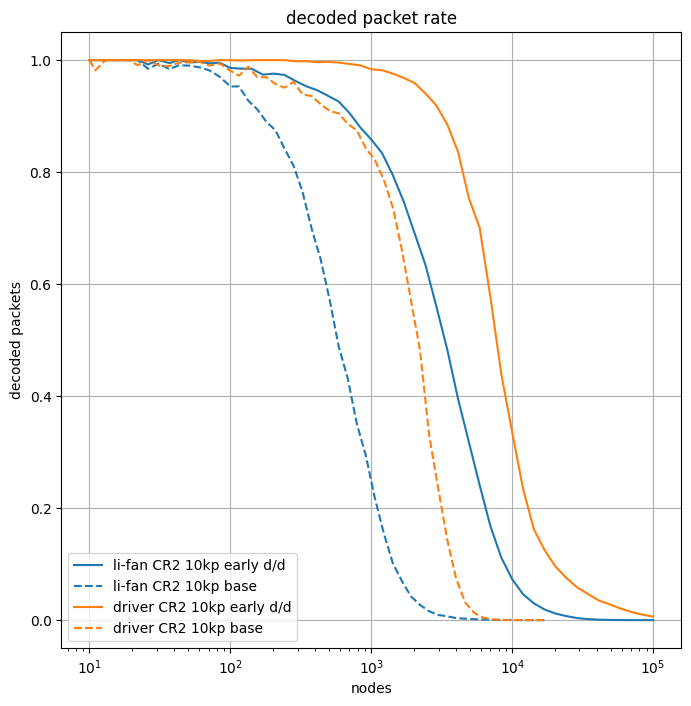

In [16]:
plt.figure(figsize=(8,8))

plt.plot(nodes, np.divide(dataNetwork10kp['lifan-CR2-10kp-dec_pckts'],nodes), label=f'li-fan CR2 10kp early d/d', color='#1f77b4')
plt.plot(nodes2, np.divide(dataNetwork10kp['lifan-CR2-10kp-dec_pckts-base'],nodes2), label=f'li-fan CR2 10kp base', color='#1f77b4', linestyle='dashed')

plt.plot(nodes, np.divide(dataNetwork10kp['driver-CR2-10kp-dec_pckts'],nodes), label=f'driver CR2 10kp early d/d', color='#ff7f0e')
plt.plot(nodes2, np.divide(dataNetwork10kp['driver-CR2-10kp-dec_pckts-base'],nodes2), label=f'driver CR2 10kp base', color='#ff7f0e', linestyle='dashed')

plt.title('decoded packet rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
plt.grid()
plt.legend()
plt.show()

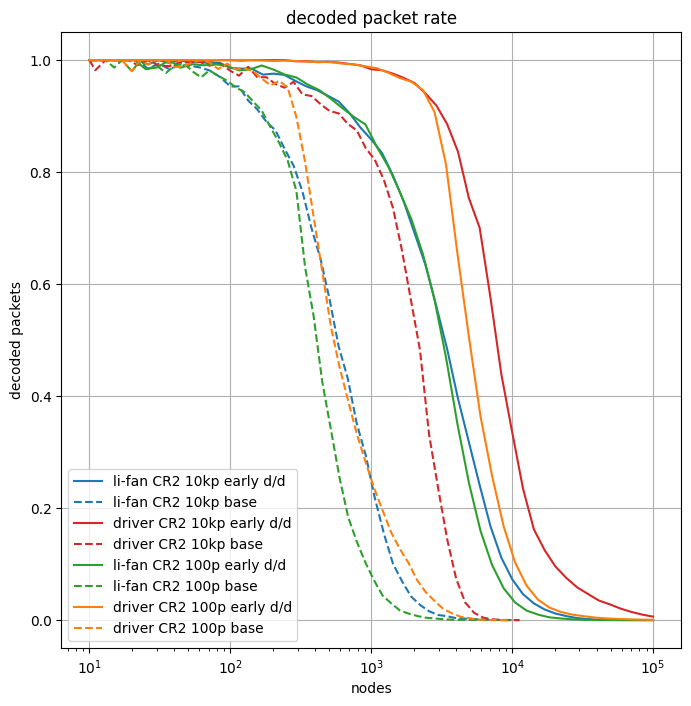

In [14]:
plt.figure(figsize=(8,8))

plt.plot(nodes, np.divide(dataNetwork10kp['lifan-CR2-10kp-dec_pckts'],nodes), label=f'li-fan CR2 10kp early d/d', color='#1f77b4')
plt.plot(nodes2, np.divide(dataNetwork10kp['lifan-CR2-10kp-dec_pckts-base'],nodes2), label=f'li-fan CR2 10kp base', color='#1f77b4', linestyle='dashed')
plt.plot(nodes, np.divide(dataNetwork10kp['driver-CR2-10kp-dec_pckts'],nodes), label=f'driver CR2 10kp early d/d', color='#d62728')
plt.plot(nodes2, np.divide(dataNetwork10kp['driver-CR2-10kp-dec_pckts-base'],nodes2), label=f'driver CR2 10kp base', color='#d62728', linestyle='dashed')

plt.plot(dataNetwork100p['nodes'].to_numpy(), np.divide(dataNetwork100p['lifan-CR2-100p-dec_pckts'],dataNetwork100p['nodes'].to_numpy()), label=f'li-fan CR2 100p early d/d', color='#2ca02c')
plt.plot(dataNetwork100p['nodes2'].to_numpy(), np.divide(dataNetwork100p['lifan-CR2-100p-dec_pckts-base'],dataNetwork100p['nodes2'].to_numpy()), label=f'li-fan CR2 100p base', color='#2ca02c', linestyle='dashed')
plt.plot(dataNetwork100p['nodes'].to_numpy(), np.divide(dataNetwork100p['driver-CR2-100p-dec_pckts'],dataNetwork100p['nodes'].to_numpy()), label=f'driver CR2 100p early d/d', color='#ff7f0e')
plt.plot(dataNetwork100p['nodes2'].to_numpy(), np.divide(dataNetwork100p['driver-CR2-100p-dec_pckts-base'],dataNetwork100p['nodes2'].to_numpy()), label=f'driver CR2 100p base', color='#ff7f0e', linestyle='dashed')

plt.title('decoded packet rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('decoded packets')
plt.grid()
plt.legend()
plt.show()